In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('titanic_train.csv')
data_train.head()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


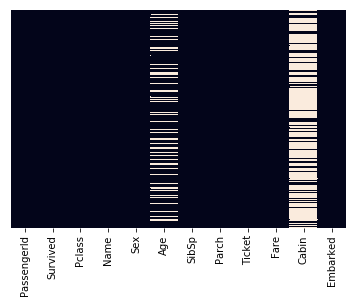

In [4]:
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False)

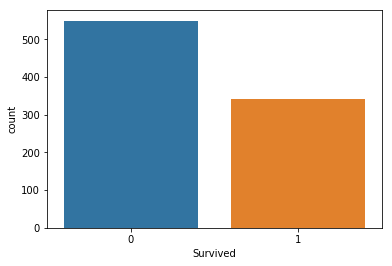

In [5]:
sns.countplot(x = 'Survived', data = data_train)

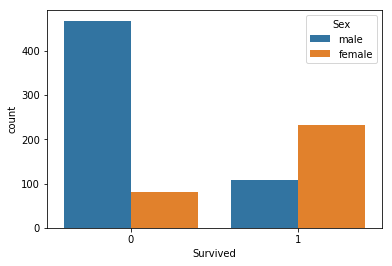

In [6]:
sns.countplot(x = 'Survived', hue = 'Sex', data = data_train)

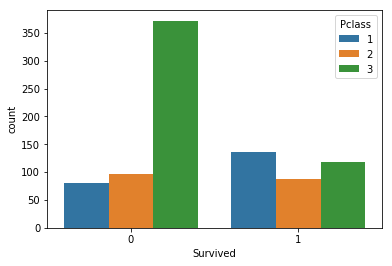

In [7]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = data_train)

/home/ps12978/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


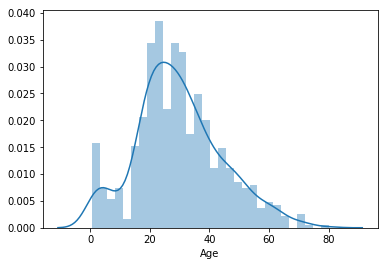

In [8]:
sns.distplot(data_train['Age'].dropna(), bins = 30)

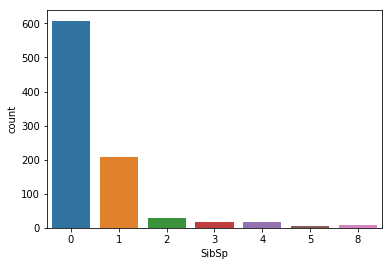

In [9]:
sns.countplot(x = 'SibSp', data = data_train)

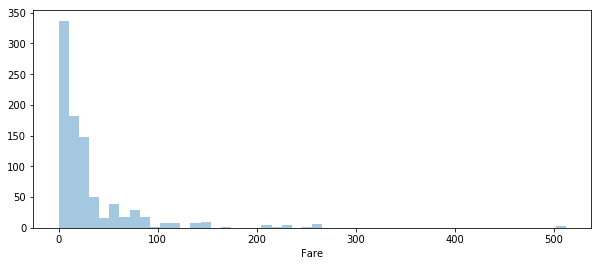

In [10]:
plt.figure(figsize = (10,4))
sns.distplot(data_train['Fare'], kde = False)

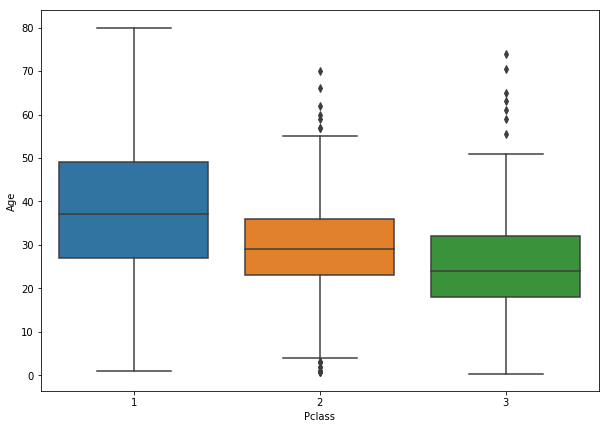

In [11]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = data_train)

In [12]:
def fillingNaN(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

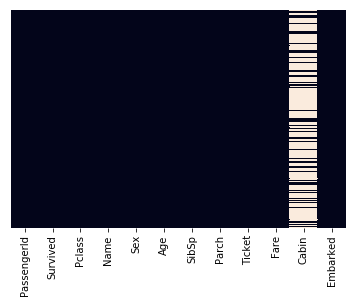

In [13]:
data_train['Age'] = data_train[['Age', 'Pclass']].apply(fillingNaN, axis = 1)
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False)

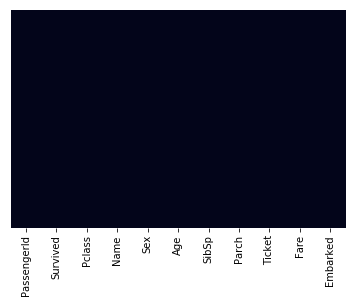

In [14]:
data_train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False)

In [15]:
Gender = pd.get_dummies(data_train['Sex'], drop_first = True)
Embark = pd.get_dummies(data_train['Embarked'], drop_first = True)
data_train = pd.concat([data_train, Gender, Embark], axis = 1)
data_train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
data_train.head()
data_train.drop('PassengerId', axis = 1, inplace = True)

In [16]:
x = data_train.drop('Survived', axis = 1)
y = data_train['Survived']

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)

/home/ps12978/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

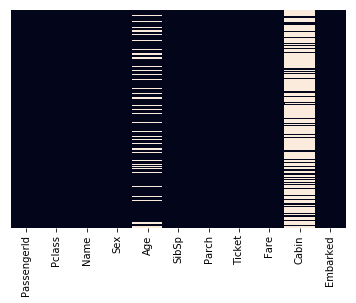

In [21]:
data_test = pd.read_csv('titanic_test.csv')
data_test.head()
sns.heatmap(data_test.isnull(), yticklabels = False, cbar = False)

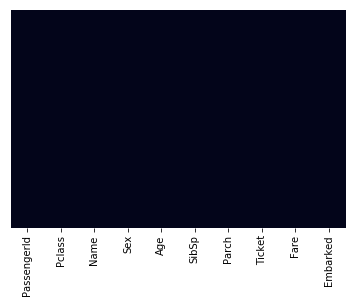

In [22]:
data_test['Age'] = data_test[['Age', 'Pclass']].apply(fillingNaN, axis = 1)
data_test.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(data_test.isnull(), yticklabels = False, cbar = False)

In [23]:
Gender = pd.get_dummies(data_test['Sex'], drop_first = True)
Embark = pd.get_dummies(data_test['Embarked'], drop_first = True)
data_test = pd.concat([data_test, Gender, Embark], axis = 1)
data_test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
data_test.drop('PassengerId', axis = 1, inplace = True)
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [29]:
data_test.fillna(data_test.mean(), inplace=True)

In [31]:
predict = model.predict(data_test)

In [34]:
ytest = pd.read_csv('gender_submission.csv')
ytest.drop('PassengerId', axis = 1, inplace = True)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))
print(accuracy_score(ytest, predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.94      0.95      0.94       152

   micro avg       0.96      0.96      0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

[[257   9]
 [  8 144]]
0.9593301435406698
